In [87]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import models,layers

In [88]:
dataset_path="C:\\Users\\HP\\Downloads\\plant_disease"

In [89]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels='inferred',   
    label_mode='int',
    shuffle=True,
    image_size=(256,256),
    batch_size=32
)   

Found 1532 files belonging to 3 classes.


In [145]:
class_names=dataset.class_names
class_names

['Test', 'Train', 'Validation']

In [91]:
for images, labels in dataset.take(1):
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)

Images shape: (32, 256, 256, 3)
Labels shape: (32,)


In [92]:
len(dataset)

48

In [93]:
train_size=0.8
len(dataset)*train_size

38.400000000000006

In [94]:
test_ds=dataset.skip(38)
len(test_ds)

10

In [95]:
val_size=0.1
len(dataset)*val_size

4.800000000000001

In [96]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [97]:
test_ds=test_ds.skip(6)
len(test_ds)

4

In [98]:
def get_partition(dataset,train_split=0.8,test_split=0.1,val_split=0.1,shuffle=True,shuffle_size=1000):
    ds_size=len(dataset)
    if shuffle:
        ds=dataset.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=dataset.take(train_size)
    val_ds=dataset.skip(train_size).take(val_size)
    test_ds=dataset.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [99]:
train_ds,test_ds,val_ds=get_partition(dataset)

In [100]:
len(train_ds)

38

In [101]:
len(test_ds)

4

In [102]:
len(val_ds)

6

In [103]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(256,256),
    layers.Rescaling(1.0/255)
])

In [104]:
Data_Augumentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [118]:
input= (256, 256, 3)  # Height, Width, Channels
n_classes = 3

model = models.Sequential([
        layers.Input(shape=input_shape),
        resize_and_rescale,
        Data_Augumentation,
        layers.Conv2D(32, (3, 3), activation='relu'),  # Define input shape here
        layers.MaxPool2D(2, 2),
        layers.Dropout(0.5),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPool2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPool2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPool2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPool2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPool2D(2, 2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(n_classes, activation='softmax'),
])


In [122]:
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_15 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_16 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_78 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_79 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_80 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_81 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_82 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_83 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 551,242 (2.10 MB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 367,495 (1.40 MB)

In [123]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.96
)
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [128]:
history=model.fit(train_ds,epochs=10,batch_size=32,verbose=1,validation_data=val_ds)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.8822 - loss: 0.4387 - val_accuracy: 0.8670 - val_loss: 0.5208
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.8694 - loss: 0.4724 - val_accuracy: 0.8191 - val_loss: 0.5833
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.8808 - loss: 0.4431 - val_accuracy: 0.8989 - val_loss: 0.4899
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.8817 - loss: 0.4528 - val_accuracy: 0.8883 - val_loss: 0.4439
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.8679 - loss: 0.4737 - val_accuracy: 0.8351 - val_loss: 0.5374
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.8705 - loss: 0.4611 - val_accuracy: 0.8298 - val_loss: 0.5587
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.8738 - loss: 0.4631 - val_accuracy: 0.8457 - val_loss: 0.5137
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.8704 - loss: 0.4627 - val_accuracy: 0.8298 - val_los

In [129]:
model.evaluate(test_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 679ms/step - accuracy: 0.8729 - loss: 0.4638


[0.5190557241439819, 0.84375]

In [131]:
acc=history.history['accuracy']
val=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

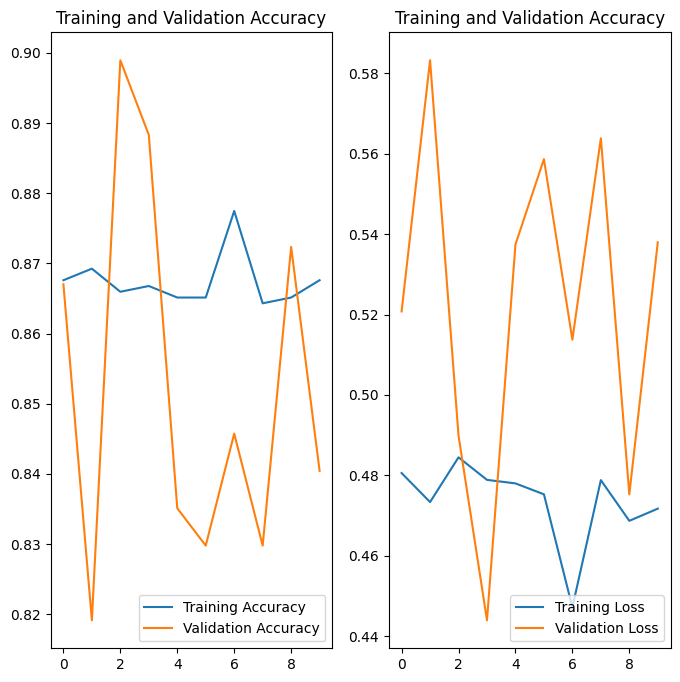

In [132]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(10),acc,label='Training Accuracy')
plt.plot(range(10),val,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(10),loss,label='Training Loss')
plt.plot(range(10),val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

first image to predict
actual label: Train
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
predicted label: Train


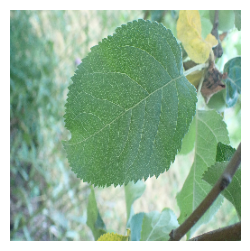

In [149]:
import numpy as np
plt.figure(figsize=(3,3))
for image_batch,label_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction=model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    plt.axis("off")

In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[]
